##ggplot in Python

The kind folks at YHat released an implentation of ggplot for Python.  Let's give it a test drive!

In [3]:
#inline plotting requires the matplotlib magic command
%matplotlib inline
from ggplot import *
import pandas as pd

In [5]:
diamonds.describe

<bound method DataFrame.describe of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5     55    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8     61    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9     65    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4     58    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3     58    335  4.34  4.35  2.75
5       0.24  Very Good     J    VVS2   62.8     57    336  3.94  3.96  2.48
6       0.24  Very Good     I    VVS1   62.3     57    336  3.95  3.98  2.47
7       0.26  Very Good     H     SI1   61.9     55    337  4.07  4.11  2.53
8       0.22       Fair     E     VS2   65.1     61    337  3.87  3.78  2.49
9       0.23  Very Good     H     VS1   59.4     61    338  4.00  4.05  2.39
10      0.30       Good     J     SI1   64.0     55    339  4.25  4.28  2.73
11      0.23      Ideal     J     VS1   

The good ol diamonds dataset looks to have transferred over just fine.  Now for some plotting.

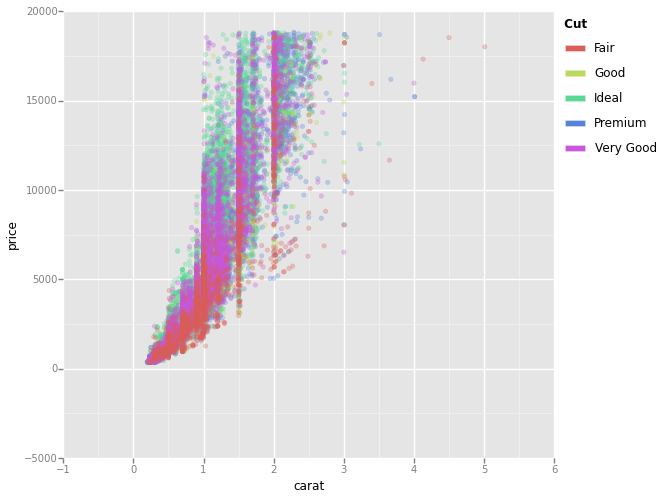

<ggplot: (283641541)>

In [15]:
ggplot(diamonds, aes(x = 'carat', y = 'price', color = 'cut')) +\
    geom_point(alpha = 0.3)

It works!  After debugging several error messages I figured out a few key differences between the original R package, and the Python implementation.  First, column names have to be quoted.  Second, it appears that all aesthetic mappings have to be stated at the base layer.  I wasn't able to pass aes(color = 'cut') as an arguement to geom_point.

In [18]:
g = ggplot(diamonds, aes(x = 'cut', y = 'price'))
g = g + geom_boxplot()
g = g + geom_point()
g

TypeError: cannot perform reduce with flexible type

In [19]:
type(diamonds.cut)

pandas.core.series.Series

In [20]:
diamonds['cut'] = diamonds['cut'].astype('category')

In [21]:
g = ggplot(diamonds, aes(x = 'cut', y = 'price'))
g = g + geom_boxplot()
g = g + geom_point()
g

TypeError: cannot perform reduce with flexible type


Hmm I can't make boxplots of price grouped by diamond cut. After some searching on StackOverflow, it seems that plotting categorical variables on the x axis is not yet supported with this ggplot implementation. It seems that there is also only a partial list of available geoms. It is definitely off to a good start, but for now I'll keep using ggplot in R.